In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from utils import make_synthetic_binary

In [ ]:
def plot_univariate_gaussians( mean_a, std_a, mean_b, std_b, sample_size=10000, bins=30):

    X, y = make_synthetic_binary(
        n_samples=10000,
        n_features=1,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42
    )

    class0 = X[y == 0, 0]
    class1 = X[y == 1, 0]

    plt.figure(figsize=(8, 5))
    plt.hist(class0, bins=bins, density=True, alpha=0.6, label=f"Class A (mean={mean_a}, std={std_a})")
    plt.hist(class1, bins=bins, density=True, alpha=0.6, label=f"Class B (mean={mean_b}, std={std_b})")

    plt.xlabel("Feature value")
    plt.ylabel("Density")
    plt.title("Overlapping Univariate Gaussians")
    plt.legend()
    plt.show()

In [ ]:
def plot_2d_gaussians(mean_a, std_a, mean_b, std_b, sample_size=10000):


    X, y = make_synthetic_binary(
        n_samples=sample_size,
        n_features=2,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42
    )
    class0 = X[y == 0]
    class1 = X[y == 1]

    plt.figure(figsize=(6, 6))
    plt.scatter(class0[:, 0], class0[:, 1], alpha=0.5, label=f"Class A (mean={mean_a}, std={std_a})", s=10)
    plt.scatter(class1[:, 0], class1[:, 1], alpha=0.5, label=f"Class B (mean={mean_b}, std={std_b})", s=10)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Overlapping 2D Gaussians")
    plt.legend()
    plt.show()

In [ ]:

def plot_3d_gaussians(mean_a, std_a, mean_b, std_b, sample_size=10000):
    X, y = make_synthetic_binary(
        n_samples=sample_size,
        n_features=3,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42,
    )

    class0 = X[y == 0]
    class1 = X[y == 1]

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(class0[:, 0], class0[:, 1], class0[:, 2],
               alpha=0.5, s=8, label=f"Class A (mean={mean_a}, std={std_a})")
    ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2],
               alpha=0.5, s=8, label=f"Class B (mean={mean_b}, std={std_b})")

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.set_title("Overlapping 3D Gaussians")
    ax.legend(loc="upper right")

    # optional: make axes roughly equal for a nicer shape
    def _set_equal_3d(ax):
        x_limits = ax.get_xlim3d()
        y_limits = ax.get_ylim3d()
        z_limits = ax.get_zlim3d()
        x_range = x_limits[1] - x_limits[0]
        y_range = y_limits[1] - y_limits[0]
        z_range = z_limits[1] - z_limits[0]
        plot_radius = 0.5 * max(x_range, y_range, z_range)
        x_mid = 0.5 * sum(x_limits)
        y_mid = 0.5 * sum(y_limits)
        z_mid = 0.5 * sum(z_limits)
        ax.set_xlim3d([x_mid - plot_radius, x_mid + plot_radius])
        ax.set_ylim3d([y_mid - plot_radius, y_mid + plot_radius])
        ax.set_zlim3d([z_mid - plot_radius, z_mid + plot_radius])

    _set_equal_3d(ax)
    plt.show()


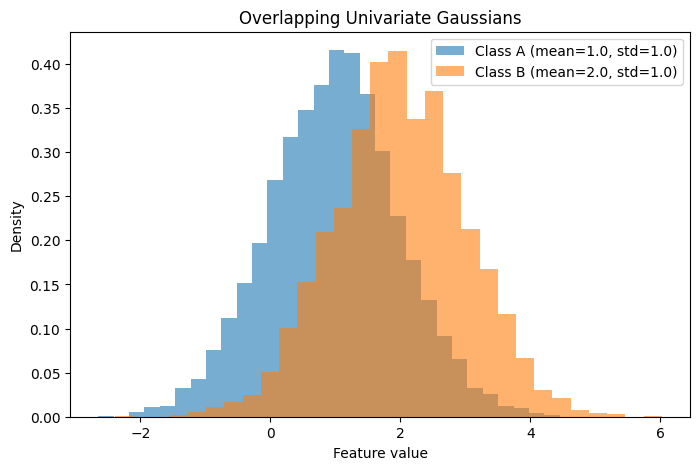

In [ ]:
std_a = 1.0
std_b = 1.0

mean_a = 1.0
mean_b = 2.0
plot_univariate_gaussians(mean_a, std_a, mean_b, std_b, bins=30)


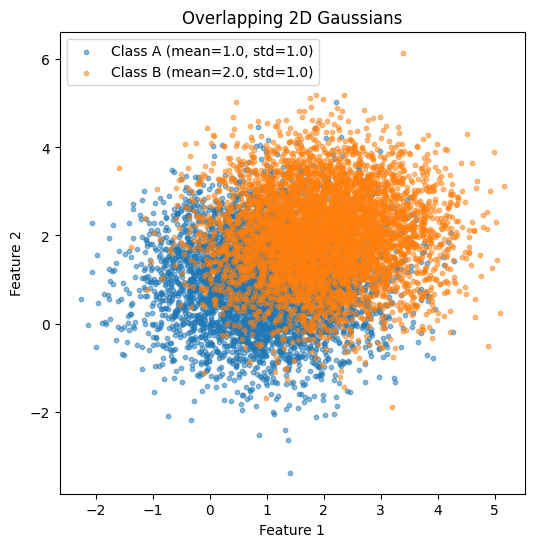

In [21]:
plot_2d_gaussians(mean_a, std_a, mean_b, std_b)

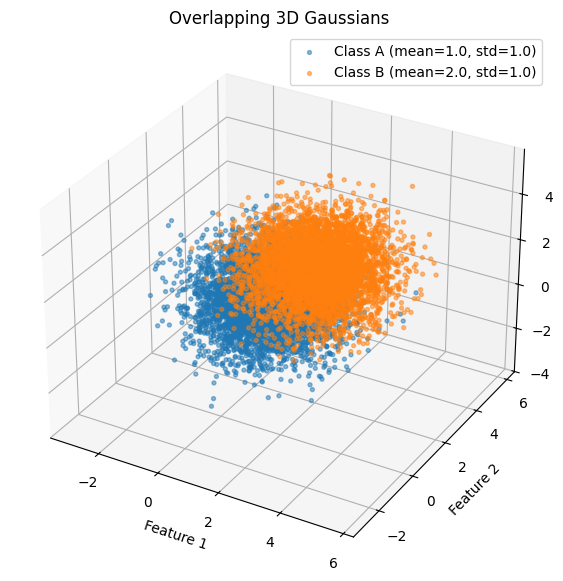

In [24]:
plot_3d_gaussians(mean_a, std_a, mean_b, std_b)

In [30]:
df = pd.read_csv("benchmark_detailed_times.csv")
df.head()

,data_gen_s,one_step_train_s,full_train_total_s,per_iter_s,per_iter_s_std,per_iter_s_median,boosts_per_sec_total,boosts_per_sec_mean,boosts_per_sec_median,test_accuracy,predict_test,predict_train,train_logloss,test_logloss
0,0.474954,0.421622,1.919664,0.019055,0.002381,0.018774,52.092448,52.478616,53.265412,0.994785,0.050380,0.195949,0.011311,0.01633
1,0.471856,0.433494,1.963200,0.019503,0.003292,0.018639,50.937257,51.273985,53.651232,0.994785,0.047247,0.194898,0.011311,0.01633
2,0.470811,0.450773,1.892605,0.018734,0.002317,0.018293,52.837216,53.378210,54.666259,0.994785,0.050999,0.199048,0.011311,0.01633
3,0.602831,0.497106,2.416522,0.024075,0.005849,0.022742,41.381794,41.536161,43.971949,0.994785,0.052064,0.208452,0.011311,0.01633
4,0.481286,0.434625,1.867241,0.018546,0.002382,0.018269,53.554953,53.920339,54.738915,0.994785,0.051631,0.202270,0.011311,0.01633


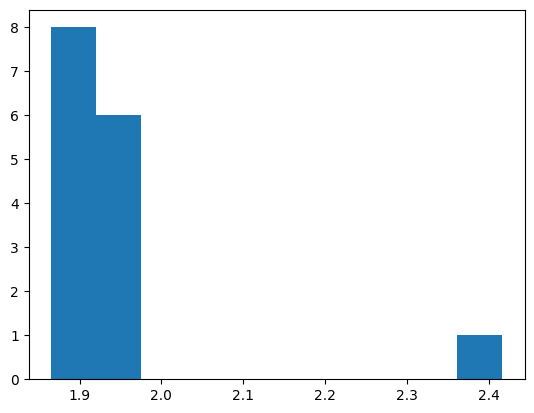

In [31]:
plt.hist(df.full_train_total_s)
plt.show()

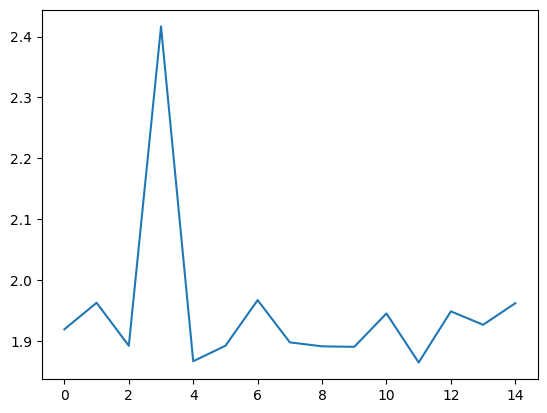

In [32]:
plt.plot(df.full_train_total_s)

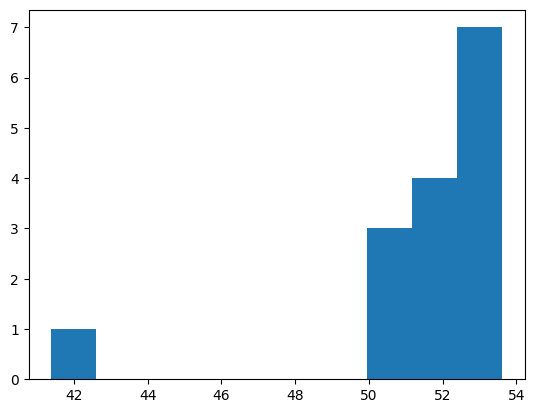

In [33]:
plt.hist(df.boosts_per_sec_total)
plt.show()

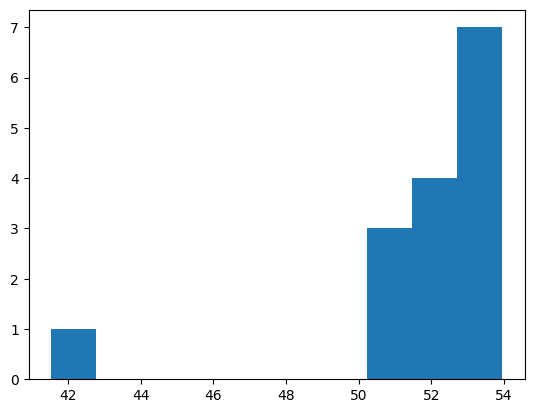

In [34]:

plt.hist(df.boosts_per_sec_mean)
plt.show()